In [10]:
import numpy as np
import seaborn as sns
import scipy.stats as stats

In [56]:
def combinations(n: int, k: int) -> int:
    """Число сочетаний.
    """
    
    return np.math.factorial(n) // (np.math.factorial(k) * np.math.factorial(n - k))

In [64]:
combinations(5,3)*combinations(3,0)/combinations(9,3)

0.11904761904761904

__Решение__

Для того, чтобы найти искомое число, нужно посчитать число исходов, соответствующих вытягиванию $1$, $2$, $3$ и $4$ тузов, а затем сложить эти числа. Все эти значения считаются аналогично. Например, посчитаем число исходов в первом случае. Для этого нужно посчитать число возможностей вытащить один туз из «колоды» в $4$ туза ($C_4^1$) и число возможностей вытащить $3$ произвольные карты из оставшейся колоды в $48$ карт ($C_{48}^3$):
$$N_1 = C_4^1 \cdot C_{48}^3.$$ 

Аналогично для $i \leq 4$:
$$N_i = C_4^i \cdot C_{48}^{4 - i}.$$

#### Бернули

In [6]:
def bernuli(n,k,p):
    return combinations(n,k) * (p**k) * ((1-p)**(n-k))


In [62]:
n=40 #Число испытанийй
k = 2 # Число успехов
p = 0.7 # Вероятность успеха
bernuli(n,k,p)

5.162955264946204e-18

__Пуасоон__

В среднем за час мимо автобусной остановки проезжают 30 автобусов. Какова вероятность, что за час мимо остановки проедут: а) 30 автобусов? б) не более 15 автобусов? в) более 50 автобусов?

Для решения первого пункта достаточно прямо применить формулу Пуассона:
$$P(X = 30) = \dfrac{30^{30} e^{-30}}{30!}$$

In [7]:
def poisson_proba(k: int, lambda_: float) -> float:
    """Формула Пуассона.
    """
    
    return (lambda_ ** k) * (np.exp(-lambda_)) / np.math.factorial(k)

In [51]:
lambda_ = 30
poisson_proba(k=30, lambda_=lambda_)

0.07263452647159149

Для решения второго пункта нужно сложить несколько вероятностей. Вероятность получить не более 15 автобусов предполагает получение от 0 до 15 автобусов:
$$P(X \leq 15) = \displaystyle\sum_{i = 0}^{15} \dfrac{30^{i} e^{-30}}{i!}$$

In [52]:
sum(poisson_proba(k=i, lambda_=lambda_) for i in range(16))

0.0019474797778723065

Последний пункт наиболее хитрый. Вероятность получить более 50 автобусов предполагает получение от 50... до скольки? В принципе число автобусов, проезжающих мимо автобусной остановки за час, не ограничено. Так что суммировать придётся до бесконечности, что невозможно.

Пойдём другим способом. Мы знаем, что сумма вероятностей случайной величины всегда равна $1$. Значит, вероятность получить более 50 автобусов равна:
$$P(X > 50) = 1 - P(X \leq 50)$$

In [53]:
1 - sum(poisson_proba(k=i, lambda_=lambda_) for i in range(51))

0.0002980129818267452

In [8]:
x = [100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

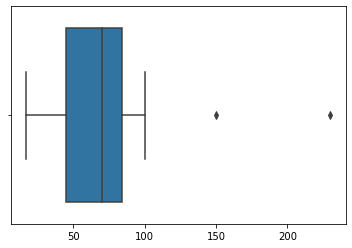

In [9]:
sns.boxplot(x)

scipy.stats
Доступные функции:
1 scipy.stats.norm.pmf — закон распределения для дискретных величин,
2 scipy.stats.t.pdf — функция плотности для непрерывных величин,
3 scipy.stats.f.cdf — функция распределения,
4 scipy.stats.norm.ppf — квантильная функция (обратная к функции распределения)


Рост взрослого населения города X имеет нормальное распределение. Причем, средний рост равен 174 см, а среднее квадратичное отклонение равно 8 см. Какова вероятность того, что случайным образом выбранный взрослый человек имеет рост:
а). больше 182 см


In [17]:
std = 8
Mx = 174
x = 182

In [18]:
Z = (x - Mx) / std
Z
P = 1 - stats.norm.cdf(Z) #т.к считаем "Больше", то отнимаем от 1
P

0.15865525393145707

In [16]:
alpha = 0.05
stats.norm.ppf(alpha)

-1.6448536269514729

#### P -VALUE

Продавец утверждает, что средний вес пачки печенья составляет 200 г. Из партии извлечена выборка из 10 пачек. Вес каждой пачки составляет:
```
202, 203, 199, 197, 195, 201, 200, 204, 194, 190
```
Известно, что их веса распределены нормально. Верно ли утверждение продавца, если учитывать, что уровень значимости равен 1%? Найдите P-значение для данного теста и укажите его в качестве ответа.

In [71]:
alpha = 0.05
x = np.array([1,2,3,4,5,5,9]) #Выборка
Mx = x.mean()  # Среднее по выборке
std = np.std(x, ddof=1)
n = x.shape[0] #размер выборки
t = (x.mean() - Mx) / (std/n**0.5) # Т статистика, т.к. не известно дисперсии ген совокуп
p_left = stats.t.cdf(t, df=n - 1)
p_right = 1 - stats.t.cdf(t, df=n - 1)

pvalue = 2 * min(p_left, p_right)
pvalue

1.0

In [72]:
alpha = 0.05
x = np.array([1,2,3,4,5,5,9]) #Выборка
Mx = x.mean()  # Среднее по выборке
std = np.std(x, ddof=1)
n = x.shape[0] #размер выборки
t = (x.mean() - Mx) / (std/n**0.5) # Т статистика, т.к. не известно дисперсии ген совокуп
p_left = stats.norm.cdf(t)
p_right = 1 - stats.norm.cdf(t)

pvalue = 2 * min(p_left, p_right)
pvalue

1.0

### Корреляция Ковариация.
Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].
Найдите ковариацию этих двух величин с помощью элементарных действий, а затем с помощью функции cov из numpy
Полученные значения должны быть равны.
Найдите коэффициент корреляции Пирсона с помощью ковариации и среднеквадратичных отклонений двух признаков,
а затем с использованием функций из библиотек numpy и pandas.


In [66]:
zp = np.array([-0.22, 1.11, -0.16, -0.32, -1.01, -1.22, 0.92, -1.26, 0.62, -0.47])
ks = np.array([0.78, 0.8, 1.03, 1.83, 0.89, -0.31, 1.19, 1.82, 1.19, 1.35])
np.cov(zp, ks, ddof=1)[0][1]


0.0527522222222222

In [67]:
np.corrcoef(zp, ks)[0][1]

0.10147237506239905

#### Доверительный интервал
Измерены значения IQ выборки студентов, обучающихся в местных технических вузах: 131, 125, 115, 122, 131, 115, 107, 99, 125, 111. Известно, что в генеральной совокупности IQ распределен нормально. Найдите доверительный интервал для математического ожидания с надежностью 0.95.

##### Используем T распределение, т.к. дисперсия генеральной совокупности не известна.

In [70]:
x = np.array([1,2,3,4,5,5,9])
x.mean()

4.142857142857143

In [45]:
X=32.56
n = 10
std = 0.12 # Берем несмещенную оценку т.к. считаем из выборки
alpha = 0.05
t = stats.t.ppf(alpha/2, df=n-1) # Используем T распределение, т.к. дисперсия генеральной совокупности не известна.


In [46]:
l_value = X+t*(std/(n**0.5))
r_value = X-t*(std/(n**0.5))

In [47]:
[l_value, r_value]


[32.4741571712857, 32.64584282871431]

##### Используем Z распределение, т.к. дисперсия генеральной совокупности  известна.

In [73]:
X=32.56
n = 6
std = 0.12 # Берем несмещенную оценку т.к. считаем из выборки
alpha = 0.05
t = stats.t.ppf(alpha/2, df=n-1) # Используем T распределение, т.к. дисперсия генеральной совокупности не известна.


In [74]:
z = stats.norm.ppf(alpha/2)

In [75]:
l_value = X+z*(std/(n**0.5))
r_value = X-z*(std/(n**0.5))

In [76]:
[l_value, r_value]


[32.4639817664729, 32.65601823352711]